In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import plot_roc_curve

from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [13]:
df = pd.read_csv('preprocessed_spam_ham_phishing.csv')

**Remove phishing emails, only consider ham and spam:**

In [14]:
df = df[df['label'] != 2]
print(df.shape)

(75419, 95)


In [15]:
df_Y = df['label']
df_X = df.drop('label', axis=1)

In [16]:
scaler = StandardScaler()

feature_list = df_X.columns

scaler.fit(df_X)
df_X = scaler.transform(df_X)
df_X = pd.DataFrame(df_X, columns=feature_list)

In [17]:
len(feature_list)

94

# **Embedded Model Features Importances:**

**Logistic Regression Feature Importance:**

Top features sorted:
Feature: missing_x-beenthere, Score: 5.566016
Feature: missing_x-spam-checker-version, Score: 5.435348
Feature: missing_in-reply-to, Score: 2.174025
Feature: domain_match_to_message-id, Score: 2.155866
Feature: missing_x-spam-check-by, Score: 2.028611
Feature: missing_x-virus-status, Score: 2.006021
Feature: missing_x-mailing-list, Score: 1.762360
Feature: missing_received-spf, Score: 1.709957
Feature: missing_delivered-to, Score: 1.538967
Feature: missing_reply-to, Score: 1.467246
Feature: received_str_forged, Score: 1.340308
Feature: missing_mailing-list, Score: 1.258246
Feature: missing_list-id, Score: 1.251394
Feature: missing_cc, Score: 1.241359
Feature: missing_list-archive, Score: 1.065882
Feature: missing_sender, Score: 0.934322
Feature: num_recipients_cc, Score: 0.924197
Feature: domain_match_return-path_reply-to, Score: 0.918377
Feature: domain_match_from_reply-to, Score: 0.865204
Feature: str_to_chevron, Score: 0.765452
Feature: missing_importance, Score

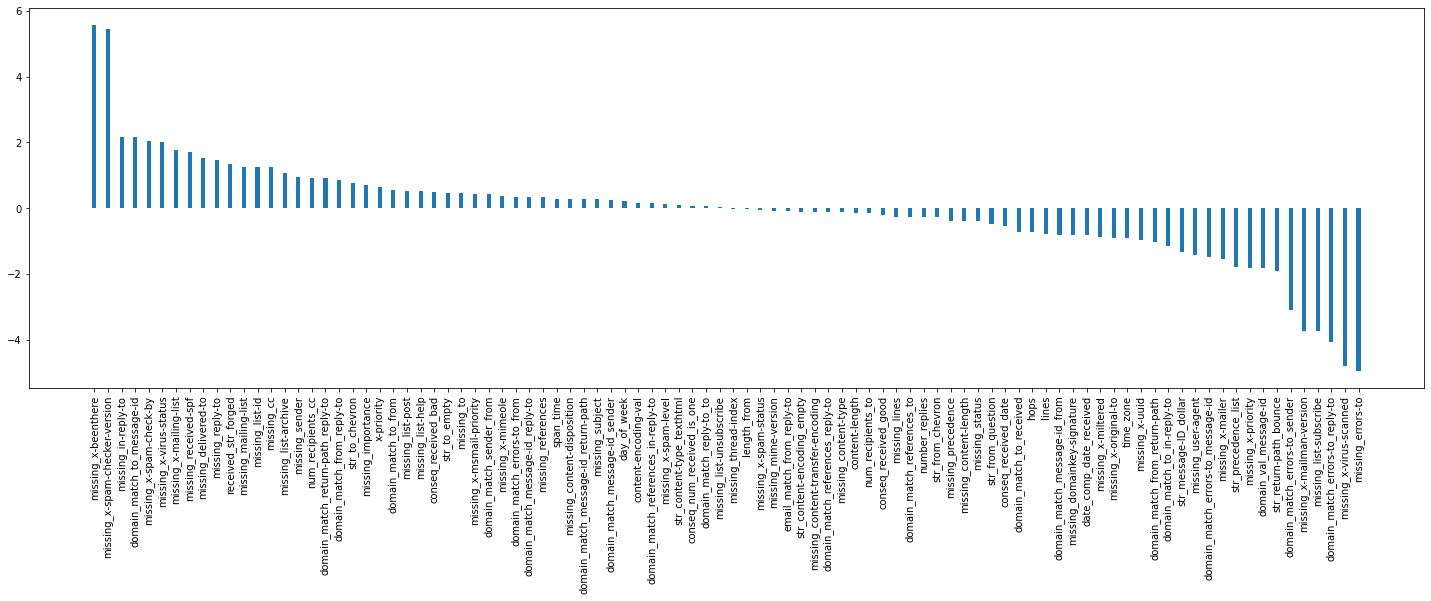

In [39]:
model = LogisticRegression(max_iter=500)

model.fit(df_X, df_Y)

importance = model.coef_[0]

fig = plt.figure(figsize =(25, 7))

importances_sorted = sorted(zip(importance, feature_list), reverse=True)
feature_sorted, importance_sorted = zip(*importances_sorted)

lr_feature_importances = importance_sorted

print("Top features sorted:")
for x, imp in zip(feature_sorted, importance_sorted):
  print('Feature: %s, Score: %f' % (imp, x))

plt.xticks(rotation='vertical')
plt.bar([x for x in importance_sorted], feature_sorted, width=0.3)
plt.savefig('linReg_featureImportance.png', bbox_inches='tight')
plt.show()

**Function code:**

In [8]:
def perform_importance_test(model):
    model.fit(df_X, df_Y)

    importance = model.feature_importances_

    fig = plt.figure(figsize =(25, 7))

    importances_sorted = sorted(zip(importance, feature_list), reverse=True)
    feature_sorted, importance_sorted = zip(*importances_sorted)

    print("Top features sorted:")
    for x, imp in zip(feature_sorted, importance_sorted):
        print('Feature: %s, Score: %f' % (imp, x))

    plt.xticks(rotation='vertical')
    plt.bar([x for x in importance_sorted], feature_sorted, width=0.3)
    plt.show()

    return importance_sorted

**Decision Tree Feature Importance:**

Top features sorted:
Feature: missing_precedence, Score: 0.646064
Feature: time_zone, Score: 0.038083
Feature: str_message-ID_dollar, Score: 0.036808
Feature: str_content-type_texthtml, Score: 0.029346
Feature: missing_thread-index, Score: 0.027235
Feature: missing_content-disposition, Score: 0.026597
Feature: str_precedence_list, Score: 0.023632
Feature: str_to_chevron, Score: 0.017458
Feature: str_return-path_bounce, Score: 0.015111
Feature: date_comp_date_received, Score: 0.014216
Feature: missing_mime-version, Score: 0.011783
Feature: missing_x-mailer, Score: 0.009086
Feature: length_from, Score: 0.009067
Feature: missing_x-spam-status, Score: 0.008093
Feature: domain_match_errors-to_reply-to, Score: 0.007694
Feature: span_time, Score: 0.007063
Feature: missing_x-miltered, Score: 0.005819
Feature: str_from_question, Score: 0.005353
Feature: domain_val_message-id, Score: 0.005136
Feature: domain_match_message-id_from, Score: 0.005089
Feature: missing_user-agent, Score: 0.003979
Feat

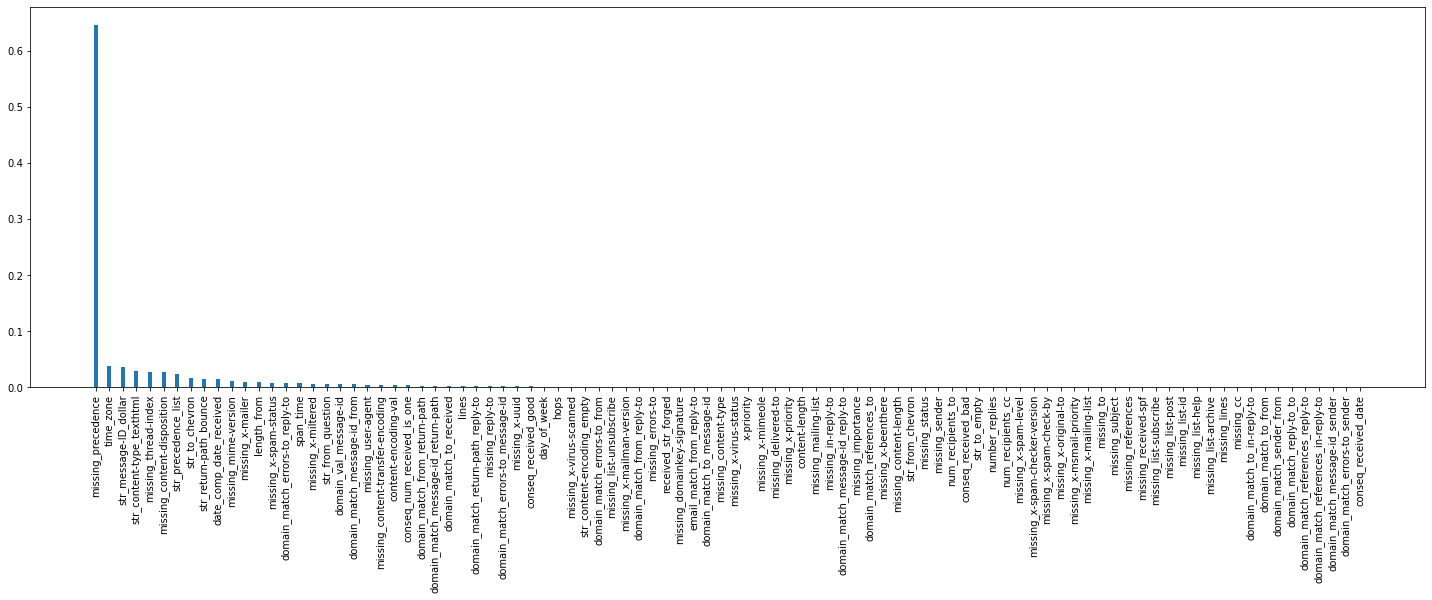

('missing_precedence',
 'time_zone',
 'str_message-ID_dollar',
 'str_content-type_texthtml',
 'missing_thread-index',
 'missing_content-disposition',
 'str_precedence_list',
 'str_to_chevron',
 'str_return-path_bounce',
 'date_comp_date_received',
 'missing_mime-version',
 'missing_x-mailer',
 'length_from',
 'missing_x-spam-status',
 'domain_match_errors-to_reply-to',
 'span_time',
 'missing_x-miltered',
 'str_from_question',
 'domain_val_message-id',
 'domain_match_message-id_from',
 'missing_user-agent',
 'missing_content-transfer-encoding',
 'content-encoding-val',
 'conseq_num_received_is_one',
 'domain_match_from_return-path',
 'domain_match_message-id_return-path',
 'domain_match_to_received',
 'lines',
 'domain_match_return-path_reply-to',
 'missing_reply-to',
 'domain_match_errors-to_message-id',
 'missing_x-uuid',
 'conseq_received_good',
 'day_of_week',
 'hops',
 'missing_x-virus-scanned',
 'str_content-encoding_empty',
 'domain_match_errors-to_from',
 'missing_list-unsubscr

In [9]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
perform_importance_test(model)

**Random Forest Feature Importance:**

Top features sorted:
Feature: missing_list-subscribe, Score: 0.101859
Feature: missing_precedence, Score: 0.067157
Feature: missing_list-help, Score: 0.064701
Feature: missing_list-post, Score: 0.059137
Feature: missing_list-unsubscribe, Score: 0.056983
Feature: missing_x-spam-status, Score: 0.052982
Feature: missing_list-id, Score: 0.038442
Feature: str_precedence_list, Score: 0.036696
Feature: missing_x-spam-checker-version, Score: 0.028764
Feature: time_zone, Score: 0.021289
Feature: missing_sender, Score: 0.019988
Feature: domain_match_to_received, Score: 0.018317
Feature: domain_match_errors-to_sender, Score: 0.018276
Feature: missing_x-mailer, Score: 0.016686
Feature: missing_errors-to, Score: 0.016608
Feature: missing_x-priority, Score: 0.015656
Feature: str_return-path_bounce, Score: 0.014789
Feature: missing_x-beenthere, Score: 0.013626
Feature: str_message-ID_dollar, Score: 0.013282
Feature: missing_delivered-to, Score: 0.012559
Feature: missing_references, Score: 0.012332
Fe

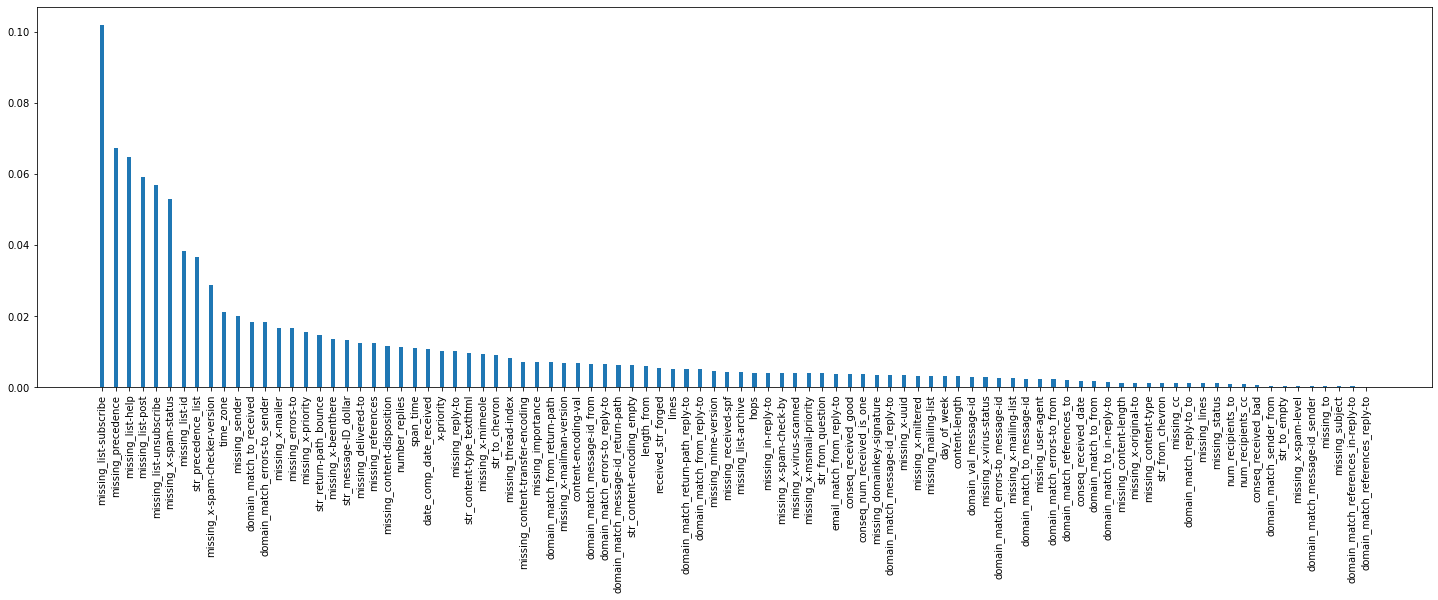

('missing_list-subscribe',
 'missing_precedence',
 'missing_list-help',
 'missing_list-post',
 'missing_list-unsubscribe',
 'missing_x-spam-status',
 'missing_list-id',
 'str_precedence_list',
 'missing_x-spam-checker-version',
 'time_zone',
 'missing_sender',
 'domain_match_to_received',
 'domain_match_errors-to_sender',
 'missing_x-mailer',
 'missing_errors-to',
 'missing_x-priority',
 'str_return-path_bounce',
 'missing_x-beenthere',
 'str_message-ID_dollar',
 'missing_delivered-to',
 'missing_references',
 'missing_content-disposition',
 'number_replies',
 'span_time',
 'date_comp_date_received',
 'x-priority',
 'missing_reply-to',
 'str_content-type_texthtml',
 'missing_x-mimeole',
 'str_to_chevron',
 'missing_thread-index',
 'missing_content-transfer-encoding',
 'missing_importance',
 'domain_match_from_return-path',
 'missing_x-mailman-version',
 'content-encoding-val',
 'domain_match_message-id_from',
 'domain_match_errors-to_reply-to',
 'domain_match_message-id_return-path',
 

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
perform_importance_test(model)

**Gradient Boosting Feature Importance:**

Top features sorted:
Feature: missing_precedence, Score: 0.460488
Feature: missing_list-subscribe, Score: 0.247141
Feature: time_zone, Score: 0.038909
Feature: str_return-path_bounce, Score: 0.030128
Feature: str_message-ID_dollar, Score: 0.028788
Feature: missing_content-disposition, Score: 0.022118
Feature: missing_thread-index, Score: 0.020690
Feature: missing_x-priority, Score: 0.017547
Feature: missing_x-spam-status, Score: 0.015816
Feature: str_content-type_texthtml, Score: 0.014846
Feature: missing_x-mailer, Score: 0.013723
Feature: str_precedence_list, Score: 0.008724
Feature: received_str_forged, Score: 0.007936
Feature: missing_content-transfer-encoding, Score: 0.007814
Feature: domain_match_message-id_return-path, Score: 0.006003
Feature: str_content-encoding_empty, Score: 0.005641
Feature: domain_match_from_return-path, Score: 0.005404
Feature: date_comp_date_received, Score: 0.005245
Feature: missing_x-uuid, Score: 0.004730
Feature: missing_reply-to, Score: 0.004648
Featur

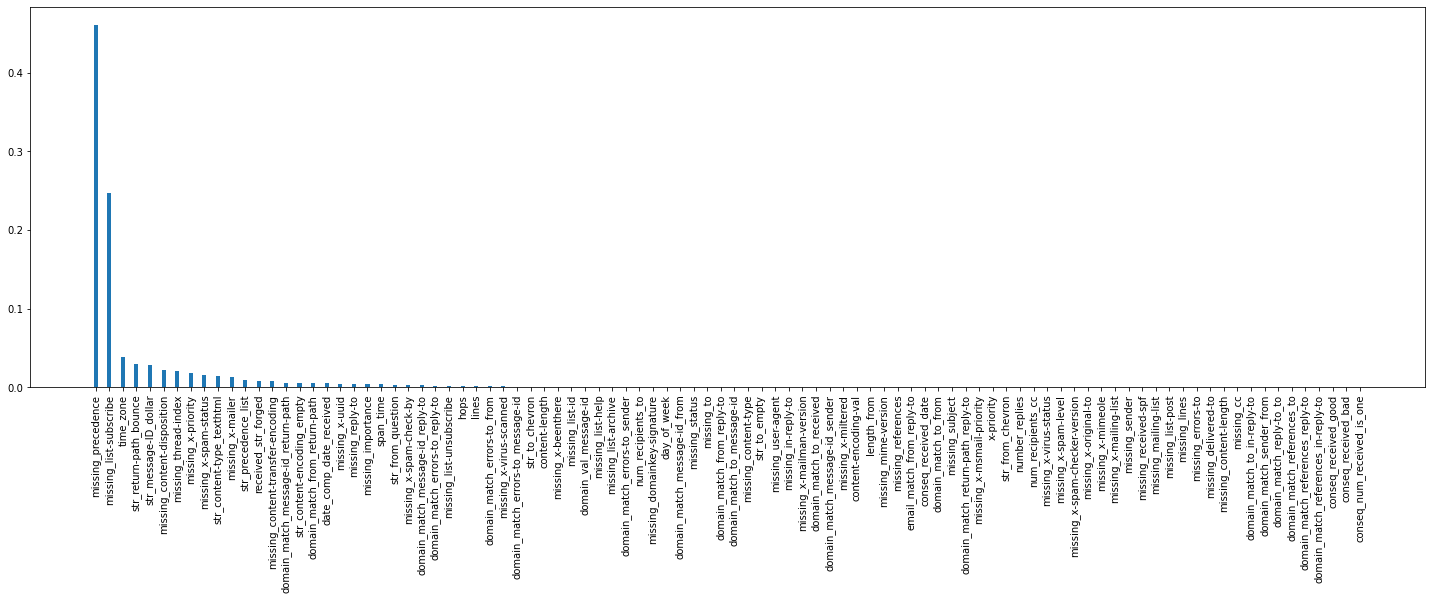

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
gb_feature_importances = perform_importance_test(model)

# **PCA:**

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=40)

pca.fit_transform(df_X)

array([[-3.12907696,  1.50157332,  0.97248024, ..., -1.12116694,
        -0.31131922, -0.31392621],
       [ 5.9455023 ,  0.14249841, -3.14803645, ..., -0.98693711,
        -0.78194419,  0.78574303],
       [-4.11519536, -0.36950598, -1.48333798, ...,  0.25927218,
         0.04028436,  0.48502189],
       ...,
       [-2.70764181,  0.05021121,  1.61475524, ..., -0.1225396 ,
        -0.28667299,  0.93754384],
       [-3.75232123,  0.18094353, -1.24481094, ..., -0.34063379,
         0.16580792, -0.5290474 ],
       [-3.79548935, -0.43274245, -0.5620965 , ...,  0.02294843,
         0.34256804, -0.25029591]])

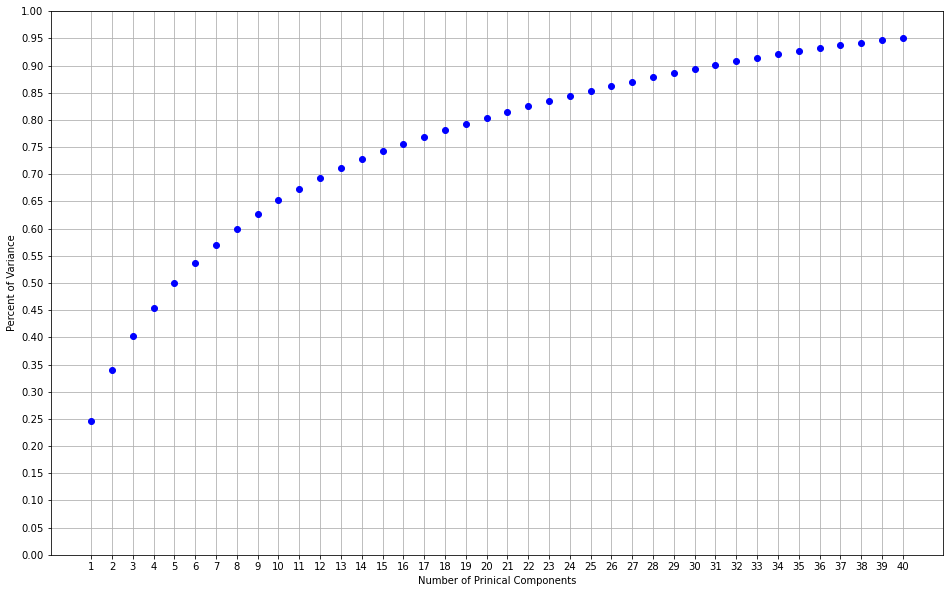

In [13]:
# Show the importance of each PCA
from matplotlib.pyplot import figure
plt.plot(np.arange(1, 41, 1), pca.explained_variance_ratio_.cumsum(), 'bo')
plt.grid()
plt.yticks(np.arange(0, 1.05, 0.05))
plt.xticks(np.arange(1, 41, 1))
plt.xlabel('Number of Prinical Components')
plt.ylabel('Percent of Variance')
fig = plt.gcf()
fig.set_size_inches(16, 10)
#plt.savefig('PCA_num_components.png', bbox_inches='tight')
plt.show()

In [14]:
print(pca.explained_variance_ratio_.cumsum())

# number of components
n_pcs = pca.components_.shape[0]

print(n_pcs)
print(pca.components_[0])

pca_to_check = 0
mapping_dict = dict(zip(feature_list, np.abs(pca.components_[pca_to_check])))
sorted_dict = {k: v for k, v in sorted(mapping_dict.items(), key=lambda item: item[1], reverse=True)}

print()
for k,v in sorted_dict.items():
    print(k,v)

[0.2463932  0.34023106 0.40243621 0.4548289  0.50066692 0.53645666
 0.5698125  0.60005523 0.62704803 0.65180353 0.67341007 0.69395065
 0.71184524 0.72728408 0.74211324 0.7560067  0.76923344 0.78201597
 0.79314156 0.80408529 0.81459443 0.8248769  0.83474704 0.84445934
 0.85362913 0.86216759 0.87064    0.87866005 0.88653066 0.89414813
 0.9013741  0.90849746 0.91480448 0.92065688 0.92637075 0.93190906
 0.9371692  0.9421313  0.94656766 0.95091855]
40
[ 0.14640252 -0.01218493 -0.00694391  0.01864398  0.02902543  0.09631334
 -0.09618879  0.09050174  0.09140631 -0.19760326  0.02639889 -0.00844638
  0.03105315  0.03091088 -0.19517827 -0.12814828 -0.19552038 -0.19751711
 -0.19754237 -0.19754237  0.07581352 -0.17942698 -0.17069759 -0.1681917
 -0.17162118 -0.17149922 -0.04242295 -0.170315    0.07425917  0.07446879
  0.07199659 -0.05274405 -0.16147297 -0.14387381 -0.14473883 -0.07656181
  0.03424313 -0.11605586 -0.06372884 -0.1130496  -0.08504094 -0.06397037
 -0.06399501 -0.02190976  0.02577594 -0

# Permutation Feature Importance Tests:

**Random Forest:**

Top features sorted:
Feature: time_zone, Score: 0.018894
Feature: missing_x-mailer, Score: 0.006152
Feature: str_content-type_texthtml, Score: 0.004064
Feature: length_from, Score: 0.003799
Feature: date_comp_date_received, Score: 0.003308
Feature: domain_match_message-id_return-path, Score: 0.002930
Feature: str_to_chevron, Score: 0.002824
Feature: domain_match_message-id_from, Score: 0.002135
Feature: missing_thread-index, Score: 0.001770
Feature: domain_match_from_return-path, Score: 0.001684
Feature: span_time, Score: 0.001067
Feature: str_return-path_bounce, Score: 0.001014
Feature: missing_user-agent, Score: 0.000782
Feature: lines, Score: 0.000524
Feature: missing_mime-version, Score: 0.000491
Feature: content-length, Score: 0.000477
Feature: day_of_week, Score: 0.000464
Feature: missing_x-mimeole, Score: 0.000285
Feature: domain_match_to_received, Score: 0.000259
Feature: content-encoding-val, Score: 0.000239
Feature: missing_domainkey-signature, Score: 0.000212
Feature: missin

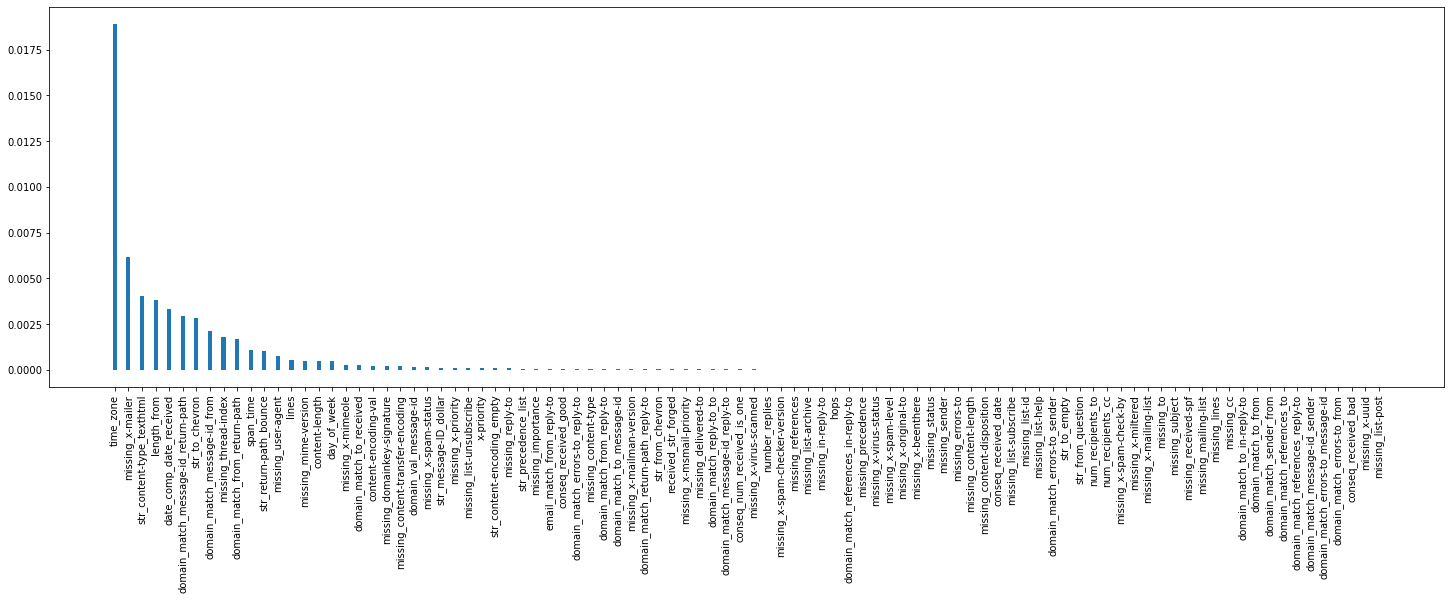

In [15]:
model = RandomForestClassifier(n_estimators=150, criterion='gini', min_samples_split=3, min_samples_leaf=1, max_features='log2')
model.fit(df_X, df_Y)

results = permutation_importance(model, df_X, df_Y, 
                                 scoring='accuracy', n_repeats=2, n_jobs=-1)
importance = results.importances_mean

fig = plt.figure(figsize =(25, 7))

importances_sorted = sorted(zip(importance, feature_list), reverse=True)
feature_sorted, importance_sorted = zip(*importances_sorted)

perm_rf_feature_importances = importance_sorted

print("Top features sorted:")
for x, imp in zip(feature_sorted, importance_sorted):
  print('Feature: %s, Score: %f' % (imp, x))

plt.xticks(rotation='vertical')
plt.bar([x for x in importance_sorted], feature_sorted, width=0.3)
plt.show()

**SVM:**

Top features sorted:
Feature: time_zone, Score: 0.014943
Feature: str_content-type_texthtml, Score: 0.014791
Feature: missing_x-mailing-list, Score: 0.012212
Feature: missing_importance, Score: 0.011708
Feature: missing_content-disposition, Score: 0.006358
Feature: domain_match_to_from, Score: 0.004747
Feature: domain_val_message-id, Score: 0.004647
Feature: missing_thread-index, Score: 0.004435
Feature: domain_match_errors-to_from, Score: 0.003951
Feature: str_from_question, Score: 0.003368
Feature: str_to_chevron, Score: 0.002778
Feature: str_from_chevron, Score: 0.002420
Feature: missing_domainkey-signature, Score: 0.002400
Feature: length_from, Score: 0.002035
Feature: domain_match_errors-to_message-id, Score: 0.001790
Feature: missing_user-agent, Score: 0.001777
Feature: date_comp_date_received, Score: 0.001710
Feature: missing_mailing-list, Score: 0.001352
Feature: missing_mime-version, Score: 0.001286
Feature: str_return-path_bounce, Score: 0.001246
Feature: missing_content-type

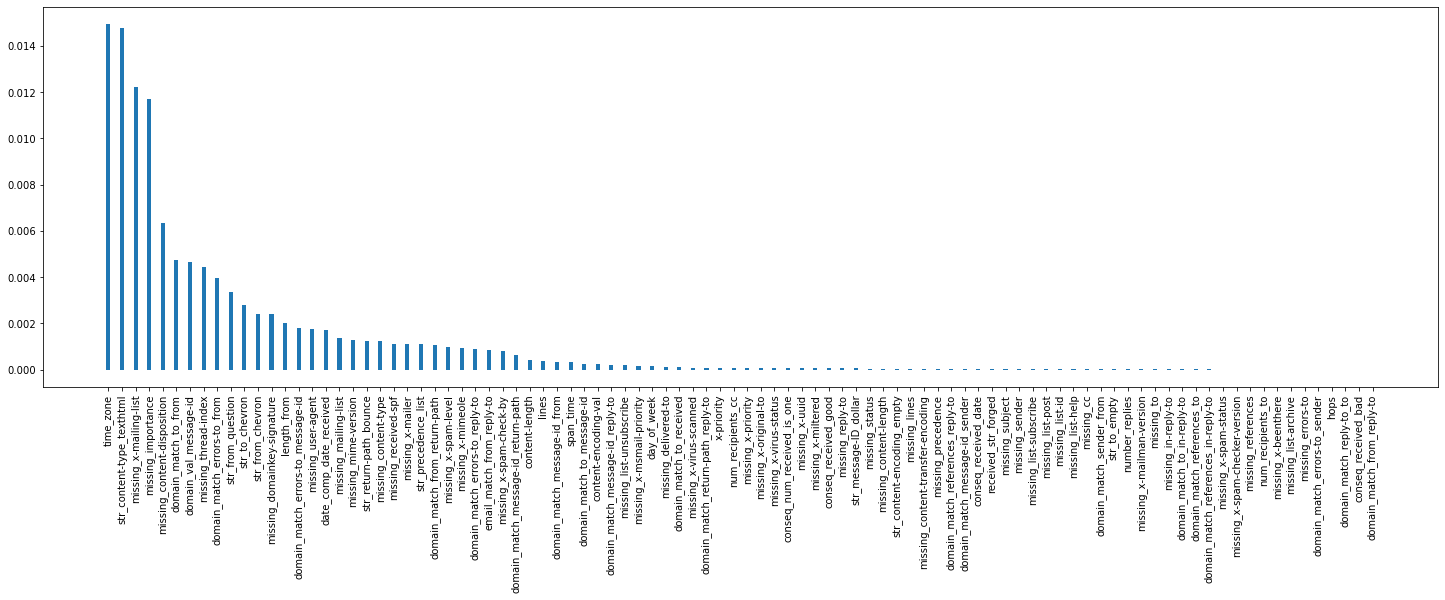

In [40]:
model = SVC(C=10, kernel='poly', degree=4, tol=0.01)
model.fit(df_X, df_Y)

results = permutation_importance(model, df_X, df_Y, 
                                 scoring='accuracy', n_repeats=2, n_jobs=-1)
importance = results.importances_mean

fig = plt.figure(figsize =(25, 7))

importances_sorted = sorted(zip(importance, feature_list), reverse=True)
feature_sorted, importance_sorted = zip(*importances_sorted)

perm_svm_feature_importances = importance_sorted

print("Top features sorted:")
for x, imp in zip(feature_sorted, importance_sorted):
  print('Feature: %s, Score: %f' % (imp, x))

plt.xticks(rotation='vertical')
plt.bar([x for x in importance_sorted], feature_sorted, width=0.3)
plt.show()

**MLP:**

Top features sorted:
Feature: time_zone, Score: 0.015215
Feature: str_content-type_texthtml, Score: 0.014187
Feature: missing_importance, Score: 0.011529
Feature: missing_x-mailer, Score: 0.010157
Feature: email_match_from_reply-to, Score: 0.009712
Feature: str_to_chevron, Score: 0.007909
Feature: domain_match_from_return-path, Score: 0.007584
Feature: missing_user-agent, Score: 0.007114
Feature: domain_match_errors-to_reply-to, Score: 0.006285
Feature: domain_match_to_from, Score: 0.005655
Feature: date_comp_date_received, Score: 0.005542
Feature: domain_val_message-id, Score: 0.005324
Feature: missing_x-mailman-version, Score: 0.004793
Feature: received_str_forged, Score: 0.004621
Feature: missing_x-original-to, Score: 0.004269
Feature: str_return-path_bounce, Score: 0.004210
Feature: missing_x-mailing-list, Score: 0.004110
Feature: missing_x-msmail-priority, Score: 0.003958
Feature: domain_match_sender_from, Score: 0.003779
Feature: str_precedence_list, Score: 0.003766
Feature: str_

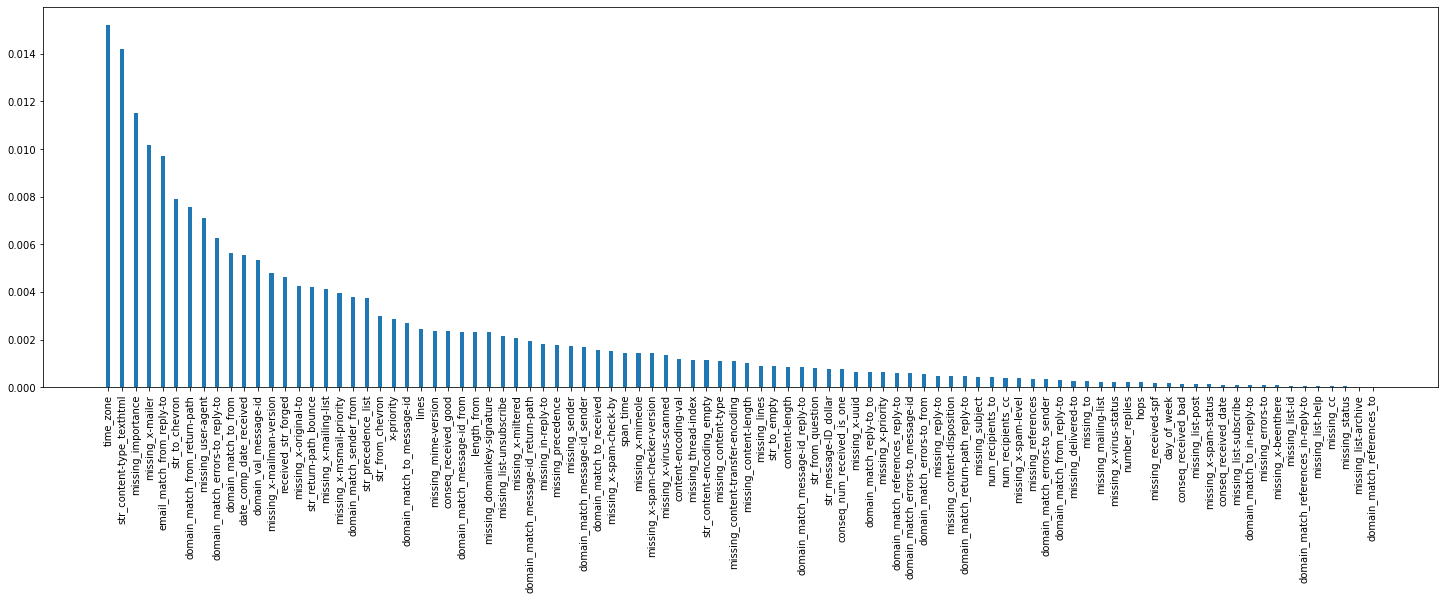

In [19]:
model = MLPClassifier(hidden_layer_sizes=(40,40), activation='relu', learning_rate='constant', alpha=0.001, solver='adam')
model.fit(df_X, df_Y)

results = permutation_importance(model, df_X, df_Y, 
                                 scoring='accuracy', n_repeats=2, n_jobs=-1)
importance = results.importances_mean

fig = plt.figure(figsize =(25, 7))

importances_sorted = sorted(zip(importance, feature_list), reverse=True)
feature_sorted, importance_sorted = zip(*importances_sorted)

perm_mlp_feature_importances = importance_sorted

print("Top features sorted:")
for x, imp in zip(feature_sorted, importance_sorted):
  print('Feature: %s, Score: %f' % (imp, x))

plt.xticks(rotation='vertical')
plt.bar([x for x in importance_sorted], feature_sorted, width=0.3)
plt.show()

**Finding the best features across the models:**

In [25]:
top_n = 25

top = [ perm_rf_feature_importances[:top_n],
        perm_svm_feature_importances[:top_n],
        perm_mlp_feature_importances[:top_n]]

counter_dict = {}

for li in top:
    for i, x in enumerate(li):
        if x in counter_dict:
            counter_dict[x] += len(li) - i
        else:
            counter_dict[x] = len(li) - i
        
output_dict = dict(sorted(counter_dict.items(), key=lambda item: item[1], reverse=True))

c = 1
for k, v in output_dict.items():
    new_k = k.replace('_', '-')
    print(c, "&", new_k, "&", v, "\\\\ \hline")
    c += 1

1 & time-zone & 74 \\ \hline
2 & str-content-type-texthtml & 72 \\ \hline
3 & str-to-chevron & 61 \\ \hline
4 & date-comp-date-received & 53 \\ \hline
5 & domain-match-from-return-path & 53 \\ \hline
6 & missing-user-agent & 51 \\ \hline
7 & missing-x-mailer & 46 \\ \hline
8 & missing-importance & 46 \\ \hline
9 & domain-match-to-from & 37 \\ \hline
10 & str-return-path-bounce & 33 \\ \hline
11 & domain-val-message-id & 33 \\ \hline
12 & length-from & 27 \\ \hline
13 & domain-match-message-id-from & 25 \\ \hline
14 & content-encoding-val & 21 \\ \hline
15 & domain-match-errors-to-reply-to & 21 \\ \hline
16 & email-match-from-reply-to & 21 \\ \hline
17 & domain-match-message-id-return-path & 20 \\ \hline
18 & missing-content-disposition & 19 \\ \hline
19 & missing-thread-index & 17 \\ \hline
20 & missing-content-transfer-encoding & 17 \\ \hline
21 & span-time & 15 \\ \hline
22 & lines & 14 \\ \hline
23 & missing-mime-version & 14 \\ \hline
24 & str-content-encoding-empty & 14 \\ \hline


# **Chi2 Feature Importance:**

In [24]:
minmax_scaler = MinMaxScaler()

X_vals_positive = minmax_scaler.fit_transform(df_X)
df_pos_vals = pd.DataFrame(X_vals_positive, columns=feature_list)

selector = SelectKBest(chi2, k=20)
selector.fit(df_pos_vals, df_Y)

X_new = selector.transform(df_pos_vals)
print(X_new.shape)

df_pos_vals.columns[selector.get_support(indices=True)].tolist()

(75419, 20)


['hops',
 'missing_x-mailer',
 'missing_list-id',
 'missing_precedence',
 'missing_list-unsubscribe',
 'missing_list-subscribe',
 'missing_list-post',
 'missing_list-help',
 'missing_x-spam-status',
 'str_return-path_bounce',
 'str_precedence_list',
 'num_recipients_cc',
 'x-priority',
 'conseq_received_date',
 'domain_match_to_in-reply-to',
 'domain_match_errors-to_sender',
 'domain_match_errors-to_reply-to',
 'domain_match_references_in-reply-to',
 'domain_match_references_to',
 'domain_match_to_received']